### Importacion de librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Perceptron:
    def __init__(self, eta=0.1, n_iter=10):
        #eta = taza de aprendizaje
        #n_iter = numero de iteraciones
        #w_ = pesos ya ajustados
        #errors_ = errores por iteracion
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        #X = vectores de entrenamiento
        #y = valores de destino
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi

    def net_input(self, X):
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

In [3]:
df = pd.read_csv("iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


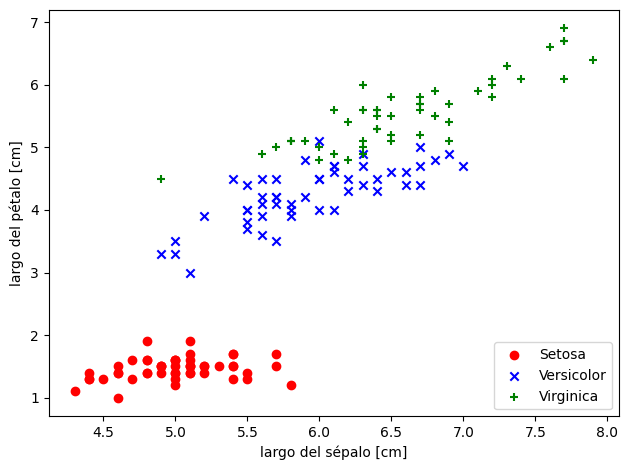

In [5]:
X_all = df.iloc[:,[0,2]].values

plt.scatter(X_all[:50, 0], X_all[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X_all[50:100, 0], X_all[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X_all[100:150, 0], X_all[100:150, 1], color='green', marker='+', label='Virginica')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

 Usando el largo del sépalo y el largo del pétalo, las Setosas se puedes separar de los Versicolores y Virginicas, pero estos últimos no se pueden separar el uno del otro

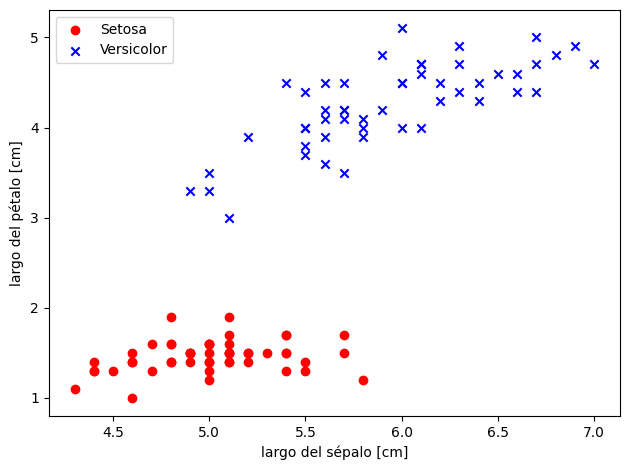

In [6]:
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolor')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

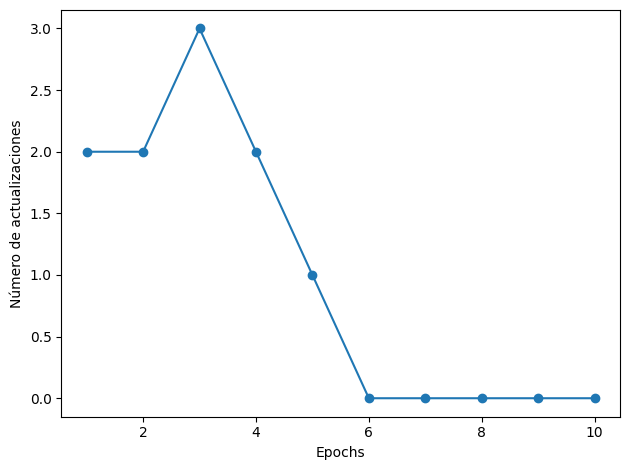

In [7]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
plt.show()

In [8]:
print("Theta: " + str(ppn.w_[0]))
print("W: " + str(ppn.w_[1:]))
print("X: [Largo sépalo, Largo pétalo]")
print("z = W · X")
print("phi(z) = 1 si z &gt;= theta; -1 c.o.c")

Theta: -0.4
W: [-0.68  1.82]
X: [Largo sépalo, Largo pétalo]
z = W · X
phi(z) = 1 si z &gt;= theta; -1 c.o.c


In [9]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
                    edgecolor='black', marker=markers[idx], label=cl)

C:\Users\kurat\AppData\Local\Temp\ipykernel_17180\3806207258.py:21: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
C:\Users\kurat\AppData\Local\Temp\ipykernel_17180\3806207258.py:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),


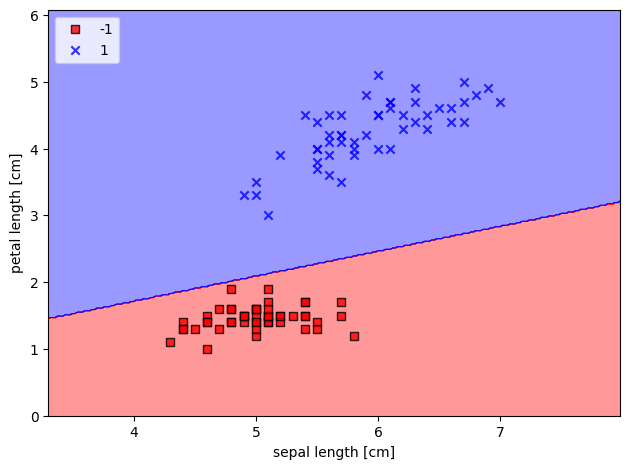

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [11]:
training_data = pd.read_csv("iris.data", header=None)
training_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df=training_data.drop([0,1,2,3], axis=1)
print(df, "\n")

                  4
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns] 

